# 네이버 스포츠뉴스 워드크라우드

In [1]:
import time
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By

* 네이버 뉴스 크롤링

In [4]:
sports = ['kbaseball','wbaseball','kfootball','wfootball','basketball','volleyball','golf','general']
base_url = 'https://sports.news.naver.com/'
sub_url = '/news/index?isphoto=N&page='

In [5]:
driver = webdriver.Chrome()
url = f'{base_url}kbaseball{sub_url}1'
driver.get(url)

In [6]:
# 기사목록
soup = BeautifulSoup(driver.page_source, 'html.parser')
lis = soup.select('.news_list > ul > li')
len(lis)

20

In [7]:
# 기사 제목
li = lis[0]
title = li.select_one('.title').get_text().strip()
title

'프로야구 6개 구단 단장이 LG 출신…트윈스 천하'

* 종목별로 몇페이가 있는 확인

In [8]:
url = f'{base_url}wfootball{sub_url}1'
driver.get(url)

In [9]:
soup = BeautifulSoup(driver.page_source, 'html.parser')
lis = soup.select('.news_list > ul > li')
len(lis)

20

In [11]:
sports_dict = {}
for sport in sports:
    url = f'{base_url}{sport}{sub_url}1'
    driver.get(url)

    next_clicked = 0
    while True:
        try:
            driver.find_element(By.CSS_SELECTOR, '.paginate > .next').click()
            next_clicked += 1
            time.sleep(2)
        except:
            pages = driver.find_elements(By.CSS_SELECTOR, '.paginate > a')
            if next_clicked == 0:
                num_pages = len(pages) + 1
            else:
                num_pages = next_clicked * 10 + len(pages)
            sports_dict[sport] = num_pages
            break


In [12]:
sports_dict

{'kbaseball': 1,
 'wbaseball': 10,
 'kfootball': 1,
 'wfootball': 1,
 'basketball': 1,
 'volleyball': 2,
 'golf': 3,
 'general': 1}

In [13]:
title = ''
for sport, num_pages in sports_dict.items():
    for page in range(1, num_pages + 1):
        url = f'{base_url}{sport}{sub_url}{page}'
        driver.get(url)
        time.sleep(2)

        soup = BeautifulSoup(driver.page_source, 'html.parser')
        lis = soup.select('.news_list > ul > li')
        for li in lis:
            title += li.select_one('.title').get_text().strip() + '\n'

In [14]:
title.count('\n')

379

* word cloud 만들기

In [15]:
import re
import nltk
from konlpy.tag import Okt
import numpy as np 
from PIL import Image
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [16]:
okt = Okt()
tokens = okt.nouns(title)
tokens[:10]

['롯데', '신인', '명', '참석', '루키', '도', '네이션', '이웃', '사랑', '나눔']

In [17]:
news = nltk.Text(tokens, name='스포츠 기사')
wc = WordCloud(
    background_color='white', random_state= 2023,
    font_path='c:/Windows/Fonts/malgun.ttf'
).generate_from_frequencies(dict(news.vocab().most_common(300)))

(-0.5, 399.5, 199.5, -0.5)

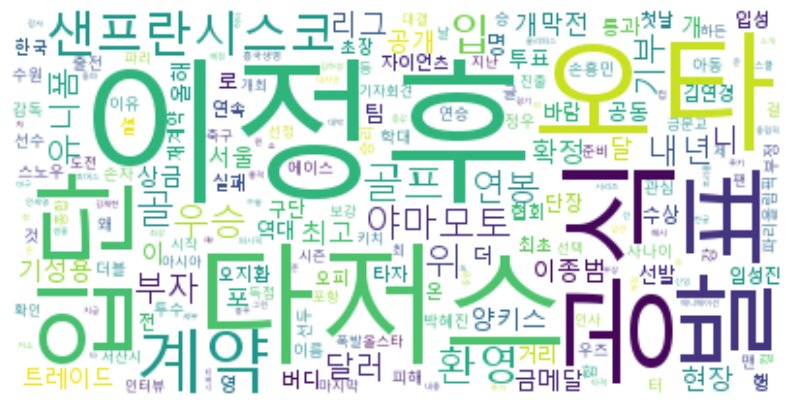

In [18]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

In [19]:
mask = np.array(Image.open('ball.jpg'))
wc = WordCloud(
    background_color='white', random_state= 2023,
    font_path='c:/Windows/Fonts/malgun.ttf', mask=mask
).generate_from_frequencies(dict(news.vocab().most_common(300)))

(-0.5, 499.5, 499.5, -0.5)

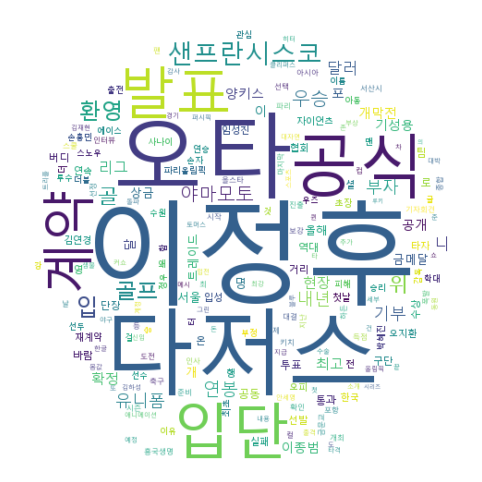

In [20]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

In [ ]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')